In [9]:
import kagglehub

path = kagglehub.dataset_download("rajugc/imdb-movies-dataset-based-on-genre")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\abhay\.cache\kagglehub\datasets\rajugc\imdb-movies-dataset-based-on-genre\versions\3


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
import json
import nltk
from collections import Counter
sns.set()

In [5]:
genre1 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\action.csv')
genre2 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\crime.csv')
genre3 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\adventure.csv')
genre4 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\thriller.csv')
genre5 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\family.csv')
genre6 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\mystery.csv')
genre7 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\scifi.csv')
genre8 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\history.csv')
genre9 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\sports.csv')
genre10 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\animation.csv')
genre11 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\war.csv')
genre12 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\biography.csv')
genre13 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\horror.csv')
genre14 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\fantasy.csv')
genre15 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\romance.csv')
genre16 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\film-noir.csv')

In [6]:
df = pd.concat([genre1, genre2, genre3, genre4,
                genre5, genre6, genre7, genre8,
                genre9, genre10, genre11, genre12,
                genre13, genre14, genre15, genre16])

df = df.reset_index(drop=True)

df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN


In [7]:
print('Shape of data: ', df.shape)

Shape of data:  (368300, 14)


In [11]:
df.loc[0, 'movie_name'], df.loc[0, 'description']

('Black Panther: Wakanda Forever',
 "The people of Wakanda fight to protect their home from intervening world powers as they mourn the death of King T'Challa.")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368300 entries, 0 to 368299
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie_id     368300 non-null  object 
 1   movie_name   368296 non-null  object 
 2   year         315052 non-null  object 
 3   certificate  104191 non-null  object 
 4   runtime      259146 non-null  object 
 5   genre        368300 non-null  object 
 6   rating       230938 non-null  float64
 7   description  368300 non-null  object 
 8   director     340931 non-null  object 
 9   director_id  340931 non-null  object 
 10  star         309605 non-null  object 
 11  star_id      316442 non-null  object 
 12  votes        230942 non-null  float64
 13  gross(in $)  25039 non-null   float64
dtypes: float64(3), object(11)
memory usage: 39.3+ MB


In [12]:
df['genre'][0]

'Action, Adventure, Drama'

In [24]:
df['genre_new'] = df['genre'].apply(lambda x: x.split(', '))

In [25]:
print(df[['genre', 'genre_new']].head())

                        genre                     genre_new
0    Action, Adventure, Drama    [Action, Adventure, Drama]
1  Action, Adventure, Fantasy  [Action, Adventure, Fantasy]
2            Action, Thriller            [Action, Thriller]
3   Action, Adventure, Comedy   [Action, Adventure, Comedy]
4      Action, Crime, Mystery      [Action, Crime, Mystery]


In [27]:
print(isinstance(df['genre_new'][0], list))

True


In [28]:
empty_genres = df[df['genre_new'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print(empty_genres)

Empty DataFrame
Columns: [movie_id, movie_name, year, certificate, runtime, genre, rating, description, director, director_id, star, star_id, votes, gross(in $), genre_new]
Index: []


In [58]:
all_genres = set(genre for sublist in df['genre_new'] for genre in sublist)

all_genres_list = list(all_genres)

print(all_genres_list)
len(set(all_genres))



['Music', 'Family', 'Game-Show', 'War', 'Thriller', 'Comedy', 'News', 'Crime', 'Adventure', 'Reality-TV', 'Horror', 'Romance', 'Drama', 'Action', 'Biography', 'Fantasy', 'Adult', 'Western', 'History', 'Animation', 'Talk-Show', 'Mystery', 'Short', 'Musical', 'Sci-Fi', 'Sport', 'Film-Noir']


27

C:\Users\abhay\AppData\Local\Temp\ipykernel_22764\2917662970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


<Axes: xlabel='Count', ylabel='Genre'>

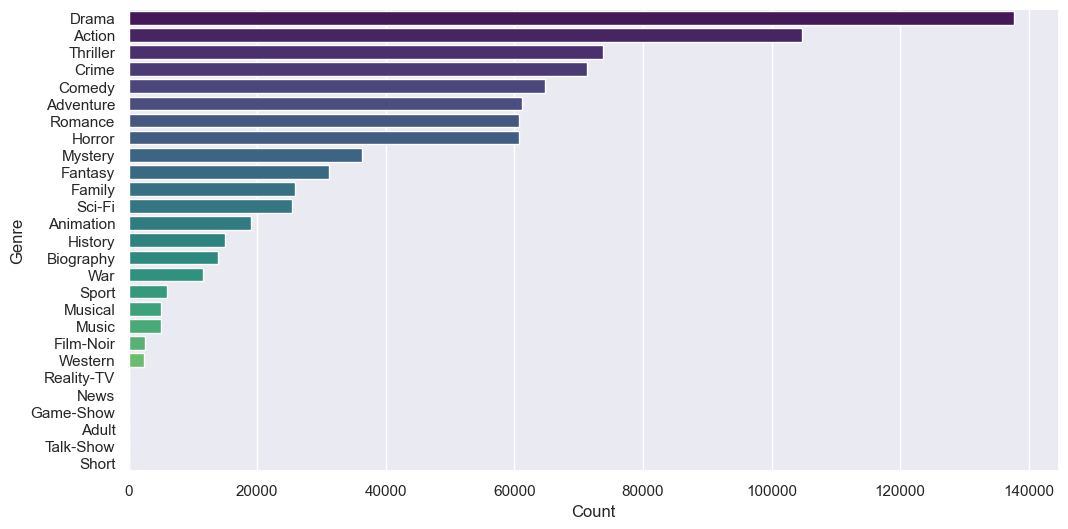

In [59]:
genre_counts = Counter(genre for sublist in df['genre_new'] for genre in sublist)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')

In [ ]:
zero_count_genres = all_genres - set(genre_counts.keys())

print("Genres with 0 count:", zero_count_genres)

Genres with 0 count: set()
